# Çoklu Dogrusal Regresyon

temel amaç,bagımlı ve bagımsız degişkenler arasındaki ilişkiyi ifade eden dogrusal fonksiyonu bulmaktır

hata kareler ortamalsını minimize ederek bulmak 

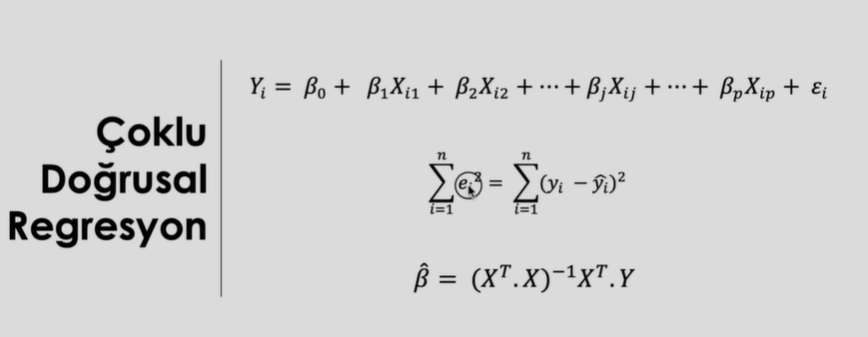

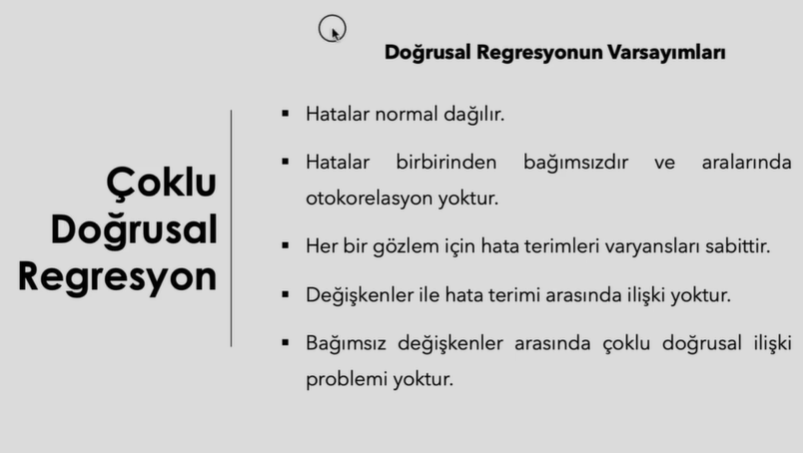

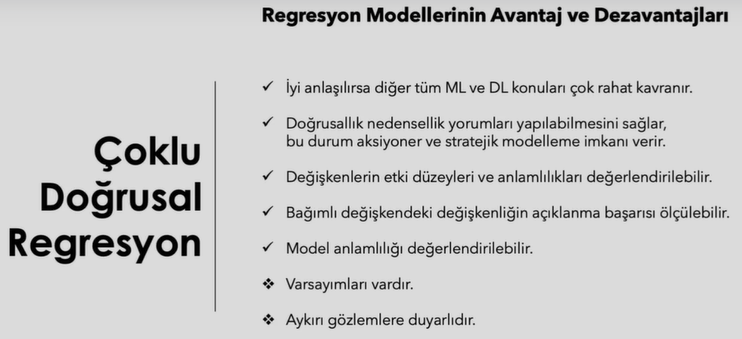

In [173]:
import pandas as pd
ad=pd.read_csv("Advertising.csv",usecols=[1,2,3,4])
df=ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [174]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict

In [175]:
X=df.drop("sales",axis=1)#sales degişkenini dışarıda bırakıp X'e atama yaptık
y=df["sales"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


In [176]:
X_train.shape

(160, 3)

In [177]:
y_train.shape

(160,)

In [178]:
X_test.shape

(40, 3)

In [179]:
y_test.shape

(40,)

In [180]:
training=df.copy()

In [181]:
training.shape#ilk hali 

(200, 4)

## Statsmodels

In [182]:
import statsmodels.api as sm
lm = sm.OLS(y_train, X_train)

In [183]:
model = lm.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Tue, 28 Dec 2021   Prob (F-statistic):                   1.28e-137
Time:                        12:02:58   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0531,0.001,36.467,0.000,0.050,0.056
radio,0.2188,0.011,20.138,0.000,0.197,0.240
newspaper,0.0239,0.008,3.011,0.003,0.008,0.040


## Scikit-Learn Model

In [185]:
from sklearn.linear_model import LinearRegression

In [186]:
lm=LinearRegression()
model=lm.fit(X_train,y_train)

In [187]:
model.intercept_#sabit katsayı

2.979067338122629

In [188]:
model.coef_#bütün bagımsız degişkenlerin katsayılarını ifade eder

array([0.04472952, 0.18919505, 0.00276111])

# Tahmin

model denklemi

sales=2.97+TV0.004+radio0.18+newspaper*0.002

örnegin 30 birim Tv harcaması,10 birim radio harcaması,40 birimde gazete harcaması oldugunda satışların tahmini degeri ne olur?

In [189]:
yeni_veri=[[30],[10],[40]]

In [190]:
yeni_veri=pd.DataFrame(yeni_veri).T

In [191]:
model.predict(yeni_veri)

array([6.32334798])

In [192]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

rmse=np.sqrt(mean_squared_error(y_train,model.predict(X_train)))#modelimizin tahmin başarısı nedir 
#parantez içi=>gerçek y degerleri,traindeki tahmin y degerleri
#model.predict(X_train)=>bagımsız degişkenleri kullanarak y şapkları oluşturuyor

In [193]:
rmse#bu bizim egitim hatamız 

1.644727765644337

In [194]:
rmse=np.sqrt(mean_squared_error(y_test,model.predict(X_test)))#egitim veri seti kurmuş oldugumuz modelin katasayılarını kullanarak,modelin daha önce hiç görmedigi  ve bagımsız degişken degerlerinden oluşan test setinin degerlerini kullanıp y tahmin degerlerini ,y test degerleri ile karşılaştırma yapıcaz 

In [195]:
rmse#test seti hatamıza erişmiş olduk 

1.7815996615334502

# MODEL TUNİNG/MODEL DOGRULAMA



In [196]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [197]:
X=df.drop('sales',axis=1)
y=df["sales"]
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=0.20,
                                              random_state=42)
lm=LinearRegression()
model=lm.fit(X_train, y_train)

In [198]:
np.sqrt(mean_squared_error(y_train,model.predict(X_train)))#egitim hatasına bakıcaz

1.644727765644337

In [199]:
model.score(X_train,y_train)#r kare degerine bakıcaz 

0.8957008271017818

In [200]:
#modelin belirli bir kısmını seçicez ama hangi belirli kısmını seçiçeksin,bu durumıu ortadan kaldırmak için croos validation yöntemi kullanılır 

In [201]:
cross_val_score(model,X,y,cv=10,scoring="r2")#10 tane farklı r2 degeri geldi

array([0.87302696, 0.8581613 , 0.92968723, 0.89013272, 0.93146498,
       0.93138735, 0.7597901 , 0.91217097, 0.83891753, 0.92882311])

In [202]:
cross_val_score(model,X,y,cv=10,scoring="r2").mean()#ortalama aldık ,bunu bütün veri seti için yaptık

0.8853562237979616

In [203]:
cross_val_score(model,X_train,y_train ,cv=10,scoring="r2").mean()#valide edilmiş score bize daha dogru bilgi verir

0.791354859691634

In [204]:
np.sqrt(-cross_val_score(model,
                X_train,
                y_train,
                cv=10,
                scoring="neg_mean_squared_error")).mean()
        #başındaki "-" ifadesi çıkacak olan skor negatif diye onu bizim daha rahat anlamamız için yaptık ,
        #elimizde 10 rmse degeri var 
        #egitim hatalarımızı gördük burada  

1.6513523730313335

In [205]:
np.sqrt(-cross_val_score(model,
                        X_test,
                        y_test,
                        cv=10,
                        scoring="neg_mean_squared_error")).mean()

1.8462778823997095

# PCR-TEMEL BİLEŞEN REGRESYONU

degişkenlere boyut indirgeme uygulandıktan sonra çıkıan bileşenlere regresyon modeli kurulması fikrine dayanır 

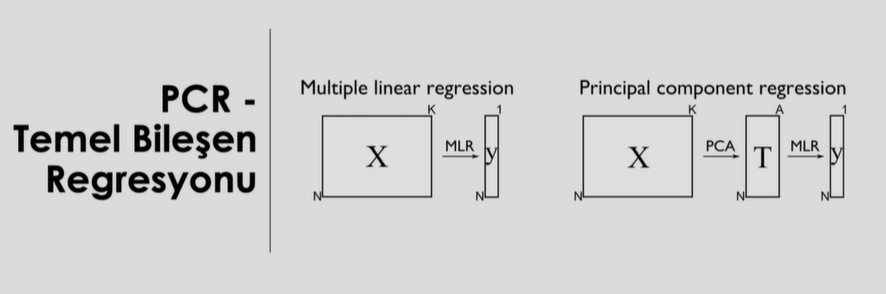

# PCR Model

In [206]:
import pandas as pd
hit=pd.read_csv("Hitters.csv")
df=hit.copy()
df=df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [208]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [209]:
dms=pd.get_dummies(df[['League','Division','NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [210]:
y=df["Salary"]

In [211]:
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float")

In [212]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [213]:
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()
#hepsini modellemeye hazır hale getirdik

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [214]:
X_train,X_test,y_train,y_test=train_test_split(X,
                                y,
                                test_size=0.25,
                                random_state=42)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training=df.copy()
print("training",training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [215]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca=PCA()

In [216]:
X_reduced_train=pca.fit_transform(scale(X_train))

In [217]:
X_reduced_train[0:1,:]#pca ile boyut indirgemesi yapıyoruz 

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [218]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:10]

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28])

In [219]:
lm=LinearRegression()

In [220]:
pcr_model=lm.fit(X_reduced_train,y_train)

In [221]:
pcr_model.intercept_

543.4834416243655

In [222]:
pcr_model.coef_#katsayıları istersek

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

In [223]:
#yukarıda veri setinde önce boyutunu indirgedik,indirgedigimiz boyut üzerinden dogrusal regresyon fit etmiş olduk 

# PCR-TAHMİN

In [224]:
y_pred=pcr_model.predict(X_reduced_train)#

In [225]:
y_pred[0:5]#egitim seti üzerine tahmin edilen degerler 

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [226]:
np.sqrt(mean_squared_error(y_train,y_pred))#rmse hatasını hesaplıyoruz 

289.3292825564977

In [227]:
df["Salary"].mean()

535.9258821292775

In [228]:
r2_score(y_train,y_pred)

0.5770075250410178

In [229]:
pca2=PCA()

In [230]:
X_reduced_test=pca2.fit_transform(scale(X_test))

In [231]:
y_pred=pcr_model.predict(X_reduced_test)#egitim seti üzerinde kurmuş oldugumuz modeli kullanarak test setinin x degerlerini modele yerleştitrerk,y nin tahmin edilen degerlerini buldum

In [232]:
np.sqrt(mean_squared_error(y_test,y_pred))#tst hatamız

405.15753641499646

# PCR Model Tuning

In [233]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))
#tek bileşneli regresyon modeli gerçekleştirdik,kullanıcı birbirinden farklı bileşen parametresini degiştirdiginde,birbirinden farklı hatalar alınabilir 

390.79142556822234


In [234]:
from sklearn import model_selection

In [235]:
cv_10=model_selection.KFold(n_splits=10,
                           shuffle=True,
                           random_state=1)
#10 katlı cross validation yapılandırması yapmış olduk 
# shuffle=True=>verilerin gruplara ayrılıp ayrılmayacagı bilgisini verir 

In [236]:
lm=LinearRegression()

In [237]:
RMSE=[]

In [238]:
for i in np.arange(1,X_reduced_train.shape[1]+1):
    score=np.sqrt(-1*model_selection.cross_val_score(lm,X_reduced_train[:,:i],
                                                    y_train.ravel(),
                                                    cv=cv_10,
                                                    scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#pcr destegi olmadıgı için brutforce destegi ile bir döngü yazarak  yapıyoruz 
#rmse leri her bir olası bileşende degerlendirerek bu işlemi kendimiz yapıyoruz

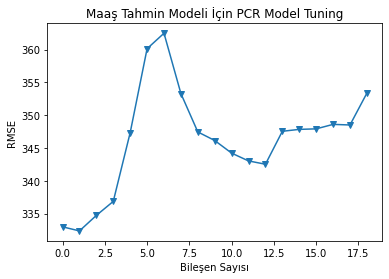

In [260]:
import matplotlib.pyplot as plt
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

In [240]:
lm=LinearRegression()

In [241]:
pcr_model=lm.fit(X_reduced_train[:,0:6],y_train)#pcr modeli kurduk 

In [242]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6])

In [243]:
print(np.sqrt(mean_squared_error(y_train,y_pred)))

308.82659830945016


In [244]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [245]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))

393.1198700096223


In [246]:
#cross validation o model için en iyi parametre degerini bulmak için kullanılır
#sınama seti olarak kullanbiliriz cross kullanılmadan

# PLS -Kısmi En Küçük Kareler Regresyonu

degişkenlerin daha az sayıda ve aralarında çoklu dogrusal baglantı problemi olmayan bileşenlere indirgenip regresyon modeli kurulması fikrine dayanır 

pcr'a benziyor bileşnleri indirgeyip onlar üzerinde regersyon kurulması olayına dayanır

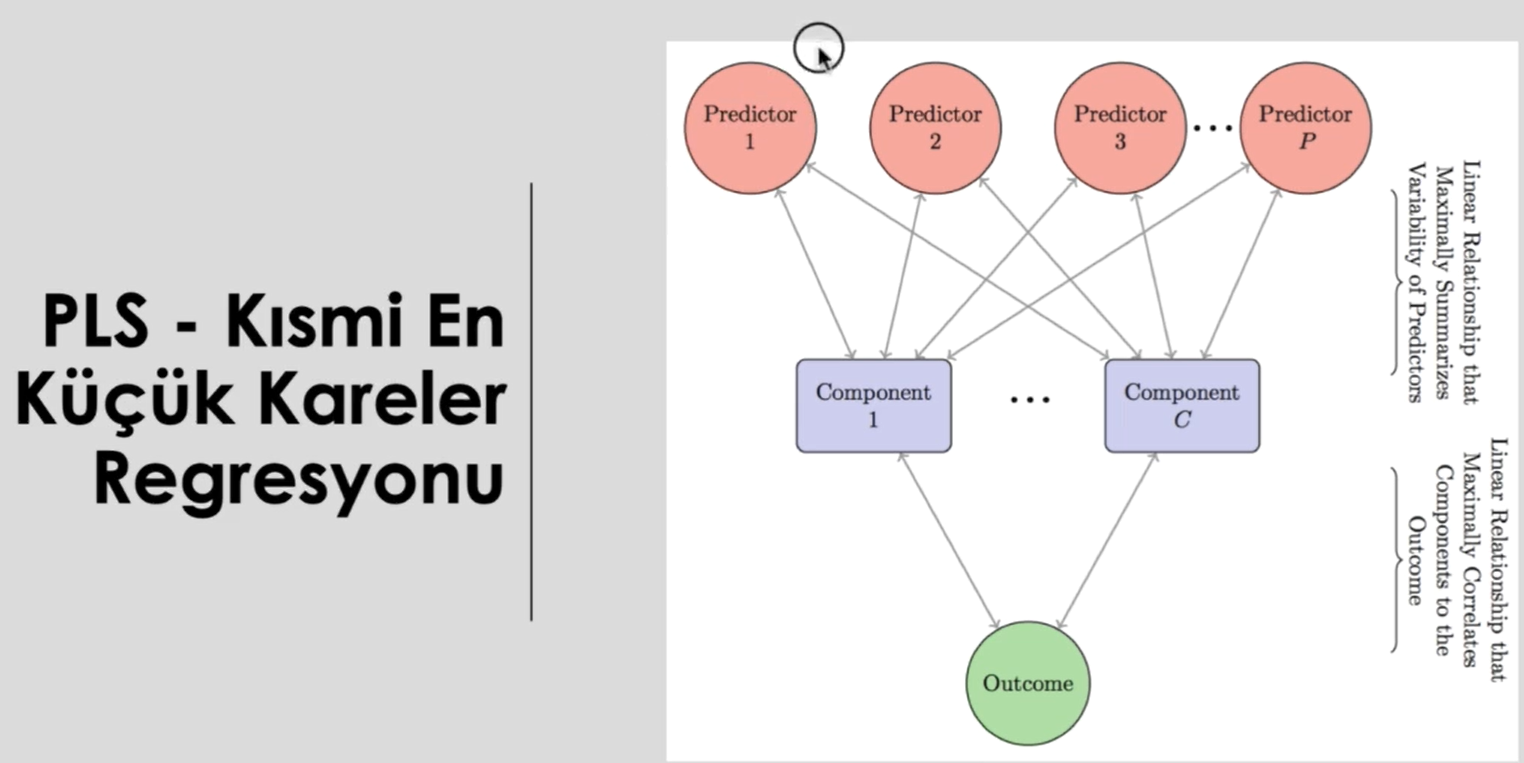

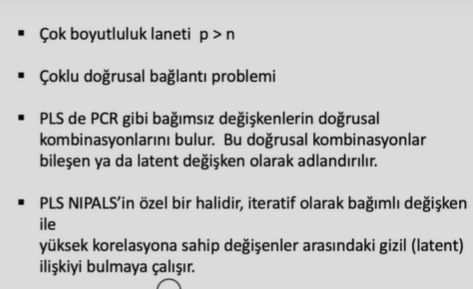

yukarıdaki son madde pcr ile pls arasındaki farkı ortaya katıyor

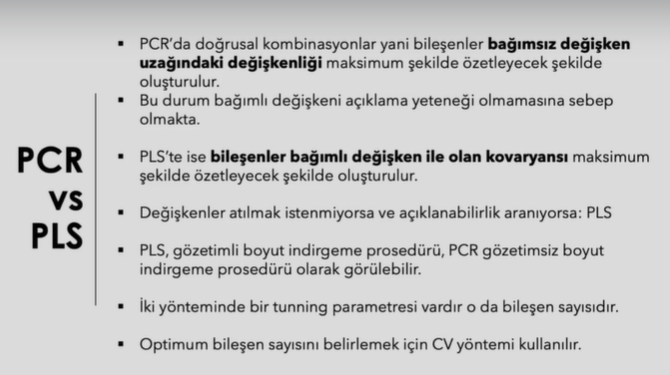

# PLS MODEL

In [247]:

hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [248]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [249]:
pls_model = PLSRegression(n_components=2).fit(X_train, y_train)

In [250]:
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

# PLS Tahmin

In [251]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


In [252]:
pls_model.predict(X_train)[0:10]

array([[344.91941493],
       [848.87070769],
       [692.93622642],
       [185.56577984],
       [435.49196077],
       [987.49530026],
       [120.63097106],
       [289.9263406 ],
       [663.41886918],
       [817.90486641]])

In [253]:
y_pred=pls_model.predict(X_train)

In [254]:
np.sqrt(mean_squared_error(y_train,y_pred))

310.1167593109696

In [255]:
r2_score(y_train,y_pred)

0.5140424486535482

In [256]:
y_pred=pls_model.predict(X_test)

In [257]:
np.sqrt(mean_squared_error(y_test,y_pred))

398.09956327448526

# Model Tuning 

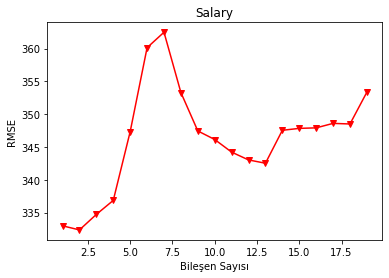

In [259]:
import matplotlib.pyplot as plt
#CV
cv_10=model_selection.KFold(n_splits=10,shuffle=True,random_state=1)
#Hata hesaplamk için döngü
RMSE=[]

for i in np.arange(1,X_train.shape[1]+1):
    pls=PLSRegression(n_components=i)
    score=np.sqrt(-1*cross_val_score(pls,X_train,y_train,cv=cv_10,scoring='neg_mean_squared_error').mean())
    RMSE.append(score)
#sonuçların görselleştirilmesi
plt.plot(np.arange(1,X_train.shape[1]+1),np.array(RMSE),'-v',c="r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

In [261]:
pls_model=PLSRegression(n_components=2).fit(X_train,y_train)

In [262]:
y_pred=pls_model.predict(X_test)

In [263]:
np.sqrt(mean_squared_error(y_test,y_pred))

398.09956327448526

In [264]:
#pls modelinde en optimum sonuca erişmeye çalışıyoruz

# Ridge Regresyon

amaç hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır

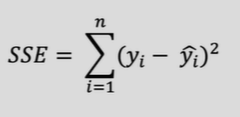

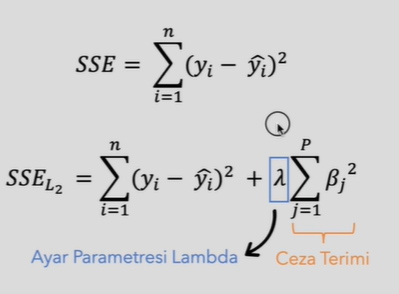

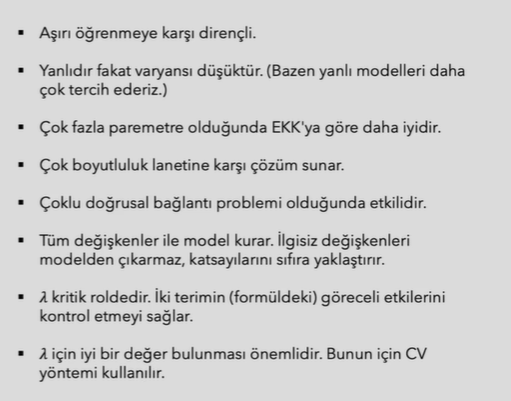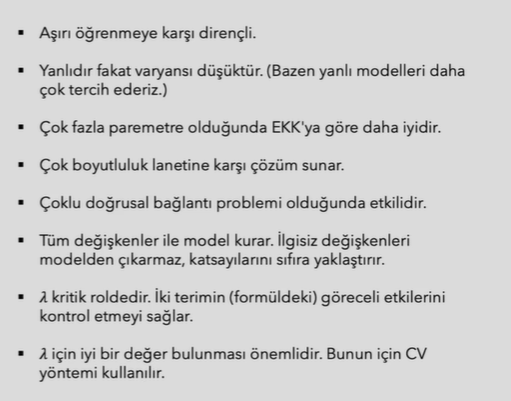

In [266]:

hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [267]:
from sklearn.linear_model import Ridge

In [268]:
ridge_model=Ridge(alpha=0.1).fit(X_train,y_train)

In [269]:
ridge_model

Ridge(alpha=0.1)

In [271]:
ridge_model.coef_#modelin katsayılarıan gideriz buradan

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [274]:
10**np.linspace(10,-2,100)*0.5#çeşitli lambda degerleri 
#lambda degeri bizim ceza şiddetinden kullandıgımız katsayıyı etki ederek şiddette boyut degiştirir

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

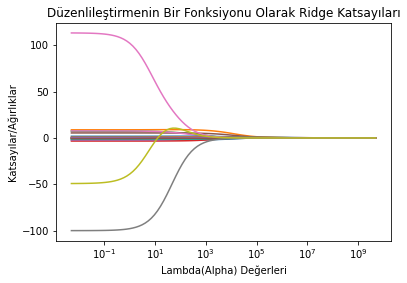

In [277]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

# Tahmin

In [278]:
y_pred=ridge_model.predict(X_test)

In [280]:
np.sqrt(mean_squared_error(y_test,y_pred))

357.05179222828434

# Ridge Regresyon için Model Tuning

In [287]:
lambdalar=10**np.linspace(10,-2,100)*0.5

In [288]:
lambdalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [291]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring = "neg_mean_squared_error",
                   normalize = True)

In [292]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [293]:
ridge_cv.alpha_

0.7599555414764666

In [294]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)

In [295]:
np.sqrt(mean_squared_error(y_test,ridge_tuned.predict(X_test)))

386.6826429756415

# Lasso Regresyon

amaç hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır,biraz daha farklı yönü ise hata katsayısını 0 yaparak uygulamaktır 

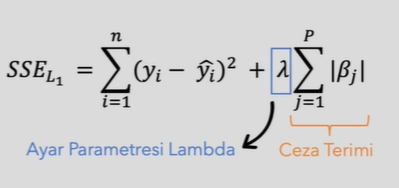

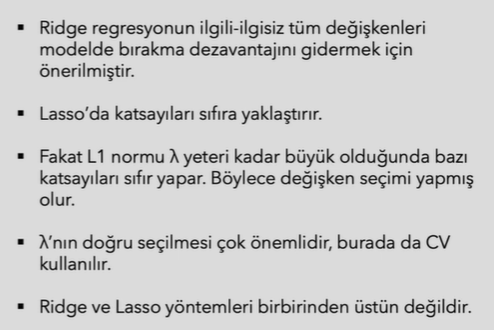

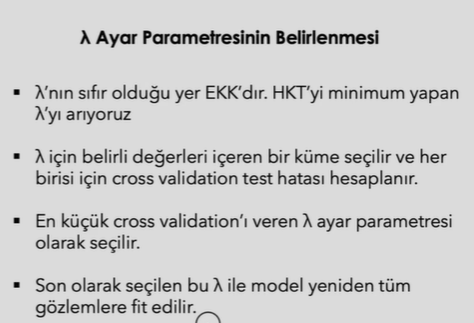

In [297]:

hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [299]:
from sklearn.linear_model import Lasso

In [300]:
lasso_model=Lasso(alpha=0.1).fit(X_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8249174.751388096, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(


In [301]:
lasso_model

Lasso(alpha=0.1)

In [302]:
lasso_model.coef_#modelin katsayılaran eriştik

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741401881, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679608315, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.756137549877, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

Text(0, 0.5, 'weights')

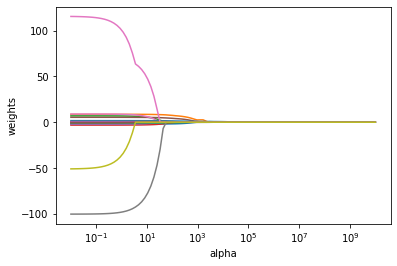

In [305]:
lasso=Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train) 
    katsayilar.append(lasso.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar) 
ax.set_xscale('log') 

plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')


# Lasso-Tahmin

In [306]:
lasso_model.predict(X_test)

array([ 613.88833029,  701.97056731, 1005.55539526,  414.08312603,
        399.18417127,  344.71444139,  664.86990217,  451.60757   ,
        914.64492066,  644.67006406,  691.60613554,  884.71702368,
        210.04523766,  446.12527252,  262.94922087,  499.22332142,
        805.2275034 ,   43.49230343, 1250.49322312,  316.34470193,
        422.96656686,  743.29944548,  572.90774248,  655.15609074,
        618.96407069,  200.75845796,  882.64622066,  254.06366112,
        430.25494812,   84.17391461,  143.60312305,  130.61554   ,
        363.74498233,  461.7321162 ,  273.42345417,  244.49816262,
       1324.62748553,  107.89909718,  135.63065031,  242.72630885,
         51.70024086,  297.57598929,  586.86143037,  398.85227639,
        763.99543074,  690.10003532,  344.06272851,  247.43966241,
        255.13234043,  662.89091837,  765.66189   ,  313.57347726,
        765.84996179,  189.77235179,  283.98765436,  589.95238974,
        663.31166365,  803.29524626,  164.99767232, 1170.24294

In [307]:
y_pred=lasso_model.predict(X_test)

In [308]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.7545270148768

# Lasso-Model Tuning

In [309]:
from sklearn.linear_model import LassoCV

In [310]:
lasso_cv_model=LassoCV(alphas=None,cv=10,max_iter=10000,
                      normalize=True)

In [311]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [312]:
lasso_cv_model.alpha_

0.39406126432470073

In [314]:
lasso_tuned=Lasso(alpha=lasso_cv_model.alpha_)#tune edilmiş lasso

In [315]:
lasso_tuned.fit(X_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8252823.943523985, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.39406126432470073)

In [316]:
y_pred=lasso_tuned.predict(X_test)

In [318]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.5226376958367

# ElasticNet Regresyonu

amaç hata karaler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır.ElasticNet L1 ve L2 yaklaşımlarını birleştirir.

ridge tarzı cezalandırma lasso tarzı degişken seçme işlemini bir araya getirir

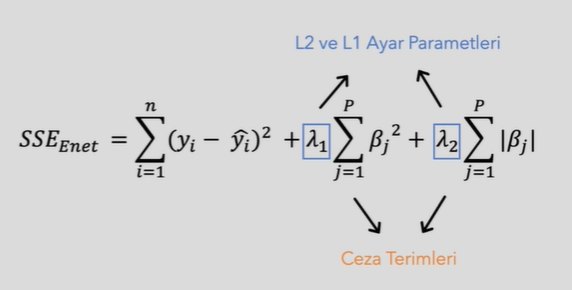

# ElasticNet Regresyonu

In [320]:

hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [321]:
from sklearn.linear_model import ElasticNet

In [322]:
enet_model=ElasticNet().fit(X_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8487984.799367279, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(


In [323]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [324]:
enet_model.intercept_

-6.465955602113127

# ElasticNet Tahmin

In [326]:
enet_model

ElasticNet()

In [327]:
enet_model.predict(X_test)

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123,  702.9157117 ,  931.50283407,
        184.87939803,  385.14973787,  325.38944176,  546.99346574,
        774.28001821,  101.83114992, 1250.86758812,  370.67651244,
        442.05734523,  781.17288513,  578.63736538,  609.31927808,
        608.31719597,  227.46556223,  921.85505228,  301.1202457 ,
        386.31721051,  133.61143326,  162.28505608,   88.29793182,
        359.9068418 ,  422.51268445,  265.8663769 ,  355.70450908,
       1329.36312363,  125.05506935,   82.74580002,  269.17483075,
        117.13319397,  274.13484779,  648.4957249 ,  409.47065999,
        846.27919406,  712.04817644,  341.10596674,  368.24259678,
        305.70477656,  680.05724792,  716.13640636,  295.93204262,
        773.06445823,  249.28224916,  221.46794589,  541.2713245 ,
        611.50212372,  770.80228024,  168.45143906, 1159.05660

In [328]:
y_pred=enet_model.predict(X_test)

In [329]:
np.sqrt(mean_squared_error(y_test,y_pred))

357.1676548181244

In [330]:
r2_score(y_test,y_pred)

0.41070222469326945

# ElasticNet - Model Tuning

In [332]:
from sklearn.linear_model import ElasticNetCV

In [333]:
enet_cv_model=ElasticNetCV(cv=10,random_state=0).fit(X_train,y_train)

In [334]:
enet_cv_model.alpha_

5230.7647364798695

In [335]:
enet_tuned=ElasticNet(alpha=enet_cv_model.alpha_).fit(X_train,y_train)

In [336]:
y_pread=enet_tuned.predict(X_test)

In [337]:
np.sqrt(mean_squared_error(y_test,y_pred))

357.1676548181244

enet=>394
,lasso=>356
,ridge=>386

en iyi çalışan model lasso oldugunu görüyoruz

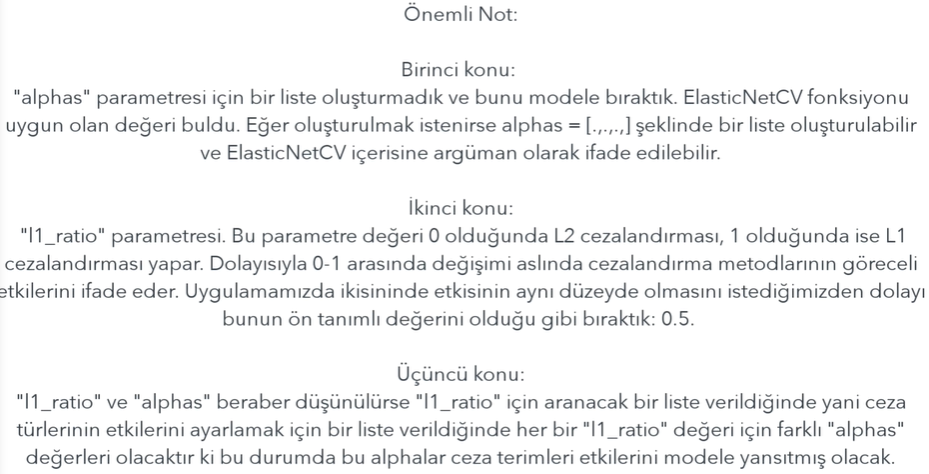